In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

issues = pd.read_csv('Issue Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'body', 'comments', 'labels', 'number', 'title','locked', 'state'])
issues

,repo_id,id,body,comments,labels,number,title,locked,state
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed
...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed


In [23]:
pr = pd.read_csv('Pull Requests Data.csv', encoding='latin-1').filter(items=[
    'repo_id', 'id', 'additions', 'body', 'comments', 'commits', 'deletions', 'merged', 'labels', 'number', 'title', 'state'])
pr

,repo_id,id,additions,body,comments,commits,deletions,merged,labels,number,title,state
0,203122320,347388722,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],5,[ImgBot] Optimize images,closed
1,203122320,332320269,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],4,[ImgBot] Optimize images,closed
2,203122320,330696289,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],3,[ImgBot] Optimize images,closed
3,203122320,323221687,0,## Beep boop. Your images are optimized!\r \r ...,0,1,0,True,[],2,[ImgBot] Optimize images,closed
4,203122320,310635861,1,-- new model heart of the core,1,1,0,True,[],1,Create craters. js,closed
...,...,...,...,...,...,...,...,...,...,...,...,...
20155,7431427,352889789,6710,This PR will update the current opus libraries...,0,2,1214,False,[],303,Opus library update (0.11 and 1.3.1).,closed
20156,7431427,145277112,1,Now the `sed` command copes with files using W...,1,1,1,False,[],279,Fix compiling renderergl2's GLSL shaders as C ...,closed
20157,7431427,18145967,3,I wasn't able to compile spearmint under Windo...,1,1,3,True,[],195,Fix Win32 compilation issue in Sys_StatFile,closed
20158,7431427,16462745,7,Fixes #63,2,1,53,False,[],187,spearmint: Remove references of PERS_SCORE in ...,closed


In [24]:
import re

issues['title_processed'] = issues['title'].map(lambda x: re.sub('[,\.!?]', '', str(x)))

issues['title_processed'] = issues['title_processed'].map(lambda x: x.lower())


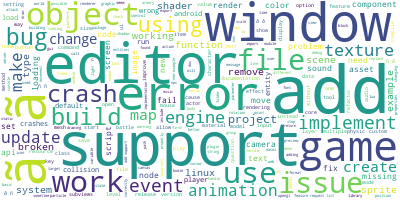

In [25]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(issues['title_processed'].values.tolist())
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [26]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', '³a', 'ªa', '¼a','¹a', 're', 'edu', 'use', 'game',
                  'fix', 'add', 'error', 'support', 'new', 'api', 'issues', 'ã'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = [*issues.title_processed.values.tolist()]
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['back', 'multiple', 'platform', 'specific', 'impl', 'classes']


In [27]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [28]:
from pprint import pprint
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=162526)
pprint(lda_model.print_topics(num_topics=5))
doc_lda = lda_model[corpus]

[(0,
  '0.020*"editor" + 0.013*"crash" + 0.008*"work" + 0.007*"using" + '
  '0.006*"engine" + 0.006*"project" + 0.006*"make" + 0.004*"linux" + '
  '0.004*"broken" + 0.004*"windows"'),
 (1,
  '0.008*"editor" + 0.007*"object" + 0.007*"animation" + 0.006*"objects" + '
  '0.006*"system" + 0.006*"bug" + 0.005*"engine" + 0.005*"crashes" + '
  '0.004*"working" + 0.004*"change"'),
 (2,
  '0.008*"editor" + 0.006*"file" + 0.006*"example" + 0.005*"build" + '
  '0.005*"entity" + 0.004*"remove" + 0.004*"texture" + 0.004*"type" + '
  '0.004*"missing" + 0.004*"version"'),
 (3,
  '0.014*"editor" + 0.006*"camera" + 0.006*"system" + 0.005*"implement" + '
  '0.005*"engine" + 0.005*"update" + 0.005*"rendering" + 0.005*"windows" + '
  '0.004*"bug" + 0.004*"issue"'),
 (4,
  '0.012*"build" + 0.008*"bug" + 0.006*"editor" + 0.006*"linux" + '
  '0.006*"engine" + 0.006*"window" + 0.005*"map" + 0.004*"system" + '
  '0.004*"example" + 0.004*"compile"')]


In [29]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk

with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.022974 -0.080384       1        1  20.883068
3      0.025643  0.011940       2        1  20.312370
0     -0.090019  0.050409       3        1  20.119881
2      0.063408  0.049489       4        1  19.499313
4      0.023943 -0.031455       5        1  19.185368, topic_info=        Term         Freq        Total Category  logprob  loglift
455    crash   537.000000   537.000000  Default  30.0000  30.0000
741    build   596.000000   596.000000  Default  29.0000  29.0000
456   editor  1488.000000  1488.000000  Default  28.0000  28.0000
194    linux   310.000000   310.000000  Default  27.0000  27.0000
31    camera   283.000000   283.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
603   create    70.879545   350.992606   Topic5  -5.8770   0.0512
12    remove    69.351908   341.259003   Topic5  -5.8988   0.0576
207   screen    68.069478   349.131233   Topic5  -5.9174   0.0161
703  windows    66.408636   419.795849   Topic5  -5.9421  -0.1929
455    crash    66.243870   537.535354   Topic5  -5.9446  -0.4426

[460 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
10333      5  0.897275  aborted
253        1  0.136064    allow
253        2  0.376445    allow
253        3  0.095245    allow
253        4  0.095245    allow
...      ...       ...      ...
4518       3  0.015113       ½a
4518       4  0.075565       ½a
4518       5  0.226694       ½a
5199       1  0.879609    ðºð¾n
5199       2  0.109951    ðºð¾n

[1152 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3, 5])

In [30]:
for i in lda_model.show_topics(num_topics=1, num_words=4):
    print(i)

(0, '0.020*"editor" + 0.013*"crash" + 0.008*"work" + 0.007*"using"')


In [31]:
lda_model.get_topic_terms(1)


[(456, 0.008183102),
 (163, 0.007133756),
 (124, 0.006891721),
 (173, 0.006355307),
 (178, 0.0058588106),
 (697, 0.005630447),
 (200, 0.0051984736),
 (199, 0.0048081395),
 (518, 0.0043987683),
 (90, 0.0042117783)]

In [32]:
topics = []
for i in lda_model.show_topics(num_topics=num_topics, num_words=4):
    aux = i[1].split('+')
    topic = []
    for j in aux:
        topic.append(j.split('*')[1].replace('"', '').replace(' ', ''))
    topics.append(topic)

topics
print(len(topics))


5


In [33]:
issues['topic'] = [-1] * 29899
issues

,repo_id,id,body,comments,labels,number,title,locked,state,title_processed,topic
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed,back to multiple platform-specific impl classes,-1
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed,impossible to add/remove components/nodes insi...,-1
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed,factory methods,-1
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed,finish with skybox as a fully built-in component,-1
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed,rename script enums,-1
...,...,...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed,add wolfet decal projector code,-1
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open,support sending server game stats to master se...,-1
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed,add demo state cgame system calls,-1
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,merge rtcw/wolfet dynamic light and corona code,-1


In [34]:
import re
for i in range(len(issues['title'])):
    find = False
    for j in range(len(topics)):
        words_re = re.compile("|".join(topics[j]))
        if not find :
            if words_re.search(str(issues['title'][i])):
                issues.at[i, 'topic'] = j
                find = True


In [35]:
issues

,repo_id,id,body,comments,labels,number,title,locked,state,title_processed,topic
0,28027226,184325122,Consider switching back to classes like OpenGL...,0,"[Label(name=""enhancement"")]",14,Back to multiple platform-specific impl classes,False,closed,back to multiple platform-specific impl classes,-1
1,28027226,126477054,This just breaks iterators,0,[],13,Impossible to add/remove components/nodes insi...,False,closed,impossible to add/remove components/nodes insi...,-1
2,28027226,125155660,Make sure factory methods and friends' stuff m...,0,"[Label(name=""enhancement"")]",12,Factory methods,False,closed,factory methods,-1
3,28027226,115748487,NaN,0,"[Label(name=""bug"")]",11,Finish with Skybox as a fully built-in component,False,closed,finish with skybox as a fully built-in component,-1
4,28027226,115746573,"Now it is `solo.EnumType_EnumValue`, should be...",0,"[Label(name=""enhancement"")]",10,Rename script enums,False,closed,rename script enums,-1
...,...,...,...,...,...,...,...,...,...,...,...
29894,7431427,10794019,"Used for bullet/explosion marks, player foot s...",4,"[Label(name=""enhancement""), Label(name=""render...",5,Add WolfET Decal Projector code,False,closed,add wolfet decal projector code,-1
29895,7431427,10793969,NaN,1,"[Label(name=""engine""), Label(name=""enhancement"")]",4,Support Sending Server Game Stats to Master Se...,False,open,support sending server game stats to master se...,-1
29896,7431427,10793903,NaN,1,"[Label(name=""enhancement"")]",3,Add Demo State Cgame System Calls,False,closed,add demo state cgame system calls,-1
29897,7431427,10793844,NaN,6,"[Label(name=""enhancement""), Label(name=""gameco...",2,Merge RTCW/WolfET Dynamic Light and Corona code,False,closed,merge rtcw/wolfet dynamic light and corona code,-1


In [36]:
issues.query('topic != -1').count()

repo_id            6858
id                 6858
body               6209
comments           6858
labels             6858
number             6858
title              6858
locked             6858
state              6858
title_processed    6858
topic              6858
dtype: int64

In [37]:
issues.describe()

,repo_id,id,comments,number,topic
count,2.989900e+04,2.989900e+04,29899.000000,29899.000000,29899.000000
mean,6.748916e+07,3.755877e+08,2.762066,374.526874,-0.456069
std,6.776820e+07,2.124645e+08,5.487790,456.576283,1.196426
min,1.182756e+06,1.326569e+06,0.000000,1.000000,-1.000000
25%,1.431899e+07,2.023521e+08,0.000000,54.000000,-1.000000
50%,4.520265e+07,3.722620e+08,1.000000,188.000000,-1.000000
75%,1.053816e+08,5.533272e+08,3.000000,531.000000,-1.000000
max,3.290342e+08,7.957906e+08,246.000000,2446.000000,4.000000


In [38]:
topics = pd.DataFrame({'id': [], 'Word 1': [], 'Prob 1': [], 'Word 2': [], 'Prob 2': [
], 'Word 3': [], 'Prob 3': [], 'Word 4': [], 'Prob 4': []})
topics

,id,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4


In [39]:
for i in lda_model.show_topics(num_topics=num_topics, num_words=4):
    words = i[1].split('+')
    words = [j.split('*') for j in words]
    topics = topics.append({'id': int(i[0]), 'Word 1': words[0][1].replace('"', '').replace(' ', ''), 'Prob 1': float(words[0][0].replace(' ', '')),
                            'Word 2': words[1][1].replace('"', '').replace(' ', ''), 'Prob 2': float(words[1][0].replace(' ', '')),
                            'Word 3': words[2][1].replace('"', '').replace(' ', ''), 'Prob 3': float(words[2][0].replace(' ', '')),
                            'Word 4': words[3][1].replace('"', '').replace(' ', ''), 'Prob 4': float(words[3][0].replace(' ', ''))}, ignore_index=True)

topics.set_index('id', inplace=True)
topics


,Word 1,Prob 1,Word 2,Prob 2,Word 3,Prob 3,Word 4,Prob 4
id,,,,,,,,
0.0,editor,0.020,crash,0.013,work,0.008,using,0.007
1.0,editor,0.008,object,0.007,animation,0.007,objects,0.006
2.0,editor,0.008,file,0.006,example,0.006,build,0.005
3.0,editor,0.014,camera,0.006,system,0.006,implement,0.005
4.0,build,0.012,bug,0.008,editor,0.006,linux,0.006


In [40]:
topics.describe()

,Prob 1,Prob 2,Prob 3,Prob 4
count,5.00000,5.000000,5.000000,5.000000
mean,0.01240,0.008000,0.006600,0.005800
std,0.00498,0.002915,0.000894,0.000837
min,0.00800,0.006000,0.006000,0.005000
25%,0.00800,0.006000,0.006000,0.005000
50%,0.01200,0.007000,0.006000,0.006000
75%,0.01400,0.008000,0.007000,0.006000
max,0.02000,0.013000,0.008000,0.007000


In [41]:
issues.to_csv('Issue Data Topic.csv', index=False)


In [42]:
topics.to_csv('Topics.csv', index=False)